In [6]:
import tensorflow as tf 

In [7]:
mnist = tf.keras.datasets.mnist ##this is handwritten dataset

In [9]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [19]:
import matplotlib.pyplot as plt ## import the matplotlib 
#plt.imshow(x_train[0])
#plt.show()
#plt.imshow(x_train[0], cmap=plt.cm.binary)

In [21]:
# print (x_train[0]

In [29]:
##we have to normolize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Display the first image in the training set
# plt.imshow(x_train[0], cmap=plt.cm.binary)
# plt.show()

In [32]:
# print (x_train[0]) # it is necessary to normalize the data 

In [41]:
import numpy as np 
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print ("Traning Sample Dimension", x_trainr.shape)
print ("Testing Sample Diamension", x_testr.shape)


Traning Sample Dimension (60000, 28, 28, 1)
Testing Sample Diamension (10000, 28, 28, 1)


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [56]:
#Creating Neural Network
model = Sequential()

## Creating Convention Layers
model.add(Conv2D(64, (3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

##creating 2 convolution layer          
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


##creating 3 convolution layer        
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))     


model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))


model.add(Dense(32))
model.add(Activation("relu"))


model.add(Dense(10))
model.add(Activation("softmax"))


In [60]:
# model.summary()

In [62]:
print ("Total Traning Samples", len(x_trainr))

Total Traning Samples 60000


In [67]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [68]:
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)


Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.7786 - loss: 0.7024 - val_accuracy: 0.9357 - val_loss: 0.2055
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.9661 - loss: 0.1101 - val_accuracy: 0.9683 - val_loss: 0.1080
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.9756 - loss: 0.0789 - val_accuracy: 0.9769 - val_loss: 0.0746
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.9809 - loss: 0.0639 - val_accuracy: 0.9762 - val_loss: 0.0816
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.9856 - loss: 0.0441 - val_accuracy: 0.9791 - val_loss: 0.0702


In [69]:
test_loss, test_acc = model.evaluate(x_testr, y_test) #eveluationg the test samples
print("test loss on 1000 samples", test_loss)
print("validation accuracy on 10,000 test sample", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9767 - loss: 0.0816
test loss on 1000 samples 0.065073162317276
validation accuracy on 10,000 test sample 0.9815999865531921


In [70]:
prediction = model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [71]:
print (prediction)

[[6.8885043e-08 3.0236569e-04 2.9128834e-05 ... 9.9964607e-01
  7.5768066e-06 3.7153605e-08]
 [1.3853608e-04 1.3882996e-04 9.9960786e-01 ... 2.6057158e-05
  2.7969490e-05 5.4660100e-06]
 [6.3913086e-07 9.9997532e-01 1.7894805e-06 ... 4.1485741e-06
  1.5012149e-06 1.6676634e-07]
 ...
 [4.5832076e-09 8.3554295e-07 2.9569593e-08 ... 1.4891918e-07
  3.2980299e-07 2.1051853e-06]
 [1.8645797e-04 2.3740092e-06 2.2266126e-07 ... 4.4368326e-06
  1.6341900e-04 6.6775319e-06]
 [2.7128719e-05 8.1284547e-08 7.3460524e-06 ... 5.7034502e-08
  2.9677369e-06 3.1884622e-06]]


In [76]:
print (np.argmax(prediction[228]))

1


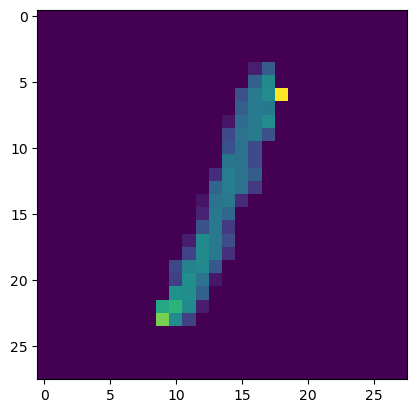

In [77]:
plt.imshow(x_test[228])

In [78]:
import cv2

In [80]:
img = cv2.imread('test.png')

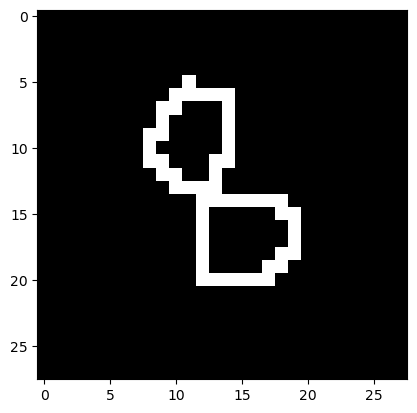

In [81]:
plt.imshow(img)

In [82]:
img.shape

(28, 28, 3)

In [83]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [84]:
gray.shape

(28, 28)

In [86]:
newimg = tf.keras.utils.normalize(gray, axis=1)

In [87]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE,IMG_SIZE,1)

In [88]:
newimg.shape

(1, 28, 28, 1)

In [89]:
predictions = model.predict(newimg) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


In [93]:
print (np.argmax(predictions))

8
